In [4]:
#importing libraries and packages
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import pickle
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score,r2_score,mean_absolute_error,mean_squared_error,accuracy_score,classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#data import
data = pd.read_csv('E:\SP Jain\python files\DataCosuppychain dataset\Final data set_analysisv1.0 - Copy.csv',header= 0,encoding='unicode_escape')
pd.set_option('display.max_columns',None)
data.head()

,Type,Benefit per order,Sales per customer,Category Name,Customer Country,Customer Id,Customer Segment,Customer Zipcode,Department Id,Department Name,Market,Order Country,Order Customer Id,Order Profit Per Order,Order Region,Order State,Shipping Mode,Fraudlent
0,DEBIT,91.250000,314.640015,Sporting Goods,Puerto Rico,20755,Consumer,725.0,2,Fitness,Pacific Asia,Indonesia,20755,91.250000,Southeast Asia,Java Occidental,Standard Class,0
1,TRANSFER,-249.089996,311.359985,Sporting Goods,Puerto Rico,19492,Consumer,725.0,2,Fitness,Pacific Asia,India,19492,-249.089996,South Asia,Rajastán,Standard Class,0
2,CASH,-247.779999,309.720001,Sporting Goods,EE. UU.,19491,Consumer,95125.0,2,Fitness,Pacific Asia,India,19491,-247.779999,South Asia,Rajastán,Standard Class,0
3,DEBIT,22.860001,304.809998,Sporting Goods,EE. UU.,19490,Home Office,90027.0,2,Fitness,Pacific Asia,Australia,19490,22.860001,Oceania,Queensland,Standard Class,0
4,PAYMENT,134.210007,298.250000,Sporting Goods,Puerto Rico,19489,Corporate,725.0,2,Fitness,Pacific Asia,Australia,19489,134.210007,Oceania,Queensland,Standard Class,0


In [6]:
# missing value identification
def features_with_missing_values(data):
    x = data.isnull().sum().sum()/(data.shape[0]*data.shape[1])*100
    print('Percentage of Total Missing Values is ' ,round(x,2) ,'%')
    print('Missing Value Estimation :')
    for i in data.columns:
        if data[i].isna().sum()>0:
            print('The Feature ',i,' has '+ str(data[i].isna().sum()) + ' missing values')
            
features_with_missing_values(data)

Percentage of Total Missing Values is  0.0 %
Missing Value Estimation :
The Feature  Customer Zipcode  has 3 missing values


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 18 columns):
Type                      180519 non-null object
Benefit per order         180519 non-null float64
Sales per customer        180519 non-null float64
Category Name             180519 non-null object
Customer Country          180519 non-null object
Customer Id               180519 non-null int64
Customer Segment          180519 non-null object
Customer Zipcode          180516 non-null float64
Department Id             180519 non-null int64
Department Name           180519 non-null object
Market                    180519 non-null object
Order Country             180519 non-null object
Order Customer Id         180519 non-null int64
Order Profit Per Order    180519 non-null float64
Order Region              180519 non-null object
Order State               180519 non-null object
Shipping Mode             180519 non-null object
Fraudlent                 180519 non-null int64
dtypes:

In [8]:
data= data.drop(['Customer Zipcode'], axis=1)

In [9]:
#split dataset in features and target variable
#features = data[:19]
x = data.iloc[:,:16]
x.head()

,Type,Benefit per order,Sales per customer,Category Name,Customer Country,Customer Id,Customer Segment,Department Id,Department Name,Market,Order Country,Order Customer Id,Order Profit Per Order,Order Region,Order State,Shipping Mode
0,DEBIT,91.250000,314.640015,Sporting Goods,Puerto Rico,20755,Consumer,2,Fitness,Pacific Asia,Indonesia,20755,91.250000,Southeast Asia,Java Occidental,Standard Class
1,TRANSFER,-249.089996,311.359985,Sporting Goods,Puerto Rico,19492,Consumer,2,Fitness,Pacific Asia,India,19492,-249.089996,South Asia,Rajastán,Standard Class
2,CASH,-247.779999,309.720001,Sporting Goods,EE. UU.,19491,Consumer,2,Fitness,Pacific Asia,India,19491,-247.779999,South Asia,Rajastán,Standard Class
3,DEBIT,22.860001,304.809998,Sporting Goods,EE. UU.,19490,Home Office,2,Fitness,Pacific Asia,Australia,19490,22.860001,Oceania,Queensland,Standard Class
4,PAYMENT,134.210007,298.250000,Sporting Goods,Puerto Rico,19489,Corporate,2,Fitness,Pacific Asia,Australia,19489,134.210007,Oceania,Queensland,Standard Class


In [10]:
#One-Hot encoding categotical variables in the data
x_encoded = pd.get_dummies(x)
x_encoded.shape

(180519, 1361)

In [11]:
x_features = x_encoded
y_features = data['Fraudlent']

In [12]:
# Split dataset into training set and test set
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

X_train, X_test, y_train, y_test = train_test_split(x_features, y_features, test_size=0.2, random_state=1) # 80% training and 20% test

In [13]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [14]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9784234433857745


In [15]:
from sklearn.tree import DecisionTreeClassifier as dtc # tree algorithm
from termcolor import colored as cl # text customization
model = dtc(criterion = 'entropy', max_depth = 5)
model.fit(X_train, y_train)

pred_model = model.predict(X_test)

print(cl('Accuracy of the model is {:.0%}'.format(accuracy_score(y_test, pred_model)), attrs = ['bold']))


Accuracy of the model is 98%


In [16]:
#tree.plot_tree(clf)

In [17]:
x_features.head()

,Benefit per order,Sales per customer,Customer Id,Department Id,Order Customer Id,Order Profit Per Order,Type_CASH,Type_DEBIT,Type_PAYMENT,Type_TRANSFER,Category Name_Accessories,Category Name_As Seen on TV!,Category Name_Baby,Category Name_Baseball & Softball,Category Name_Basketball,Category Name_Books,Category Name_Boxing & MMA,Category Name_CDs,Category Name_Cameras,Category Name_Camping & Hiking,Category Name_Cardio Equipment,Category Name_Children's Clothing,Category Name_Cleats,Category Name_Computers,Category Name_Consumer Electronics,Category Name_Crafts,Category Name_DVDs,Category Name_Electronics,Category Name_Fishing,Category Name_Fitness Accessories,Category Name_Garden,Category Name_Girls' Apparel,Category Name_Golf Apparel,Category Name_Golf Bags & Carts,Category Name_Golf Balls,Category Name_Golf Gloves,Category Name_Golf Shoes,Category Name_Health and Beauty,Category Name_Hockey,Category Name_Hunting & Shooting,Category Name_Indoor/Outdoor Games,Category Name_Kids' Golf Clubs,Category Name_Lacrosse,Category Name_Men's Clothing,Category Name_Men's Footwear,Category Name_Men's Golf Clubs,Category Name_Music,Category Name_Pet Supplies,Category Name_Shop By Sport,Category Name_Soccer,Category Name_Sporting Goods,Category Name_Strength Training,Category Name_Tennis & Racquet,Category Name_Toys,Category Name_Trade-In,Category Name_Video Games,Category Name_Water Sports,Category Name_Women's Apparel,Category Name_Women's Clothing,Category Name_Women's Golf Clubs,Customer Country_EE. UU.,Customer Country_Puerto Rico,Customer Segment_Consumer,Customer Segment_Corporate,Customer Segment_Home Office,Department Name_Apparel,Department Name_Book Shop,Department Name_Discs Shop,Department Name_Fan Shop,Department Name_Fitness,Department Name_Footwear,Department Name_Golf,Department Name_Health and Beauty,Department Name_Outdoors,Department Name_Pet Shop,Department Name_Technology,Market_Africa,Market_Europe,Market_LATAM,Market_Pacific Asia,Market_USCA,Order Country_Afganistán,Order Country_Albania,Order Country_Alemania,Order Country_Angola,Order Country_Arabia Saudí,Order Country_Argelia,Order Country_Argentina,Order Country_Armenia,Order Country_Australia,Order Country_Austria,Order Country_Azerbaiyán,Order Country_Bangladés,Order Country_Barbados,Order Country_Baréin,Order Country_Belice,Order Country_Benín,Order Country_Bielorrusia,Order Country_Bolivia,Order Country_Bosnia y Herzegovina,Order Country_Botsuana,Order Country_Brasil,Order Country_Bulgaria,Order Country_Burkina Faso,Order Country_Burundi,Order Country_Bután,Order Country_Bélgica,Order Country_Camboya,Order Country_Camerún,Order Country_Canada,Order Country_Chad,Order Country_Chile,Order Country_China,Order Country_Chipre,Order Country_Colombia,Order Country_Corea del Sur,Order Country_Costa Rica,Order Country_Costa de Marfil,Order Country_Croacia,Order Country_Cuba,Order Country_Dinamarca,Order Country_Ecuador,Order Country_Egipto,Order Country_El Salvador,Order Country_Emiratos Árabes Unidos,Order Country_Eritrea,Order Country_Eslovaquia,Order Country_Eslovenia,Order Country_España,Order Country_Estados Unidos,Order Country_Estonia,Order Country_Etiopía,Order Country_Filipinas,Order Country_Finlandia,Order Country_Francia,Order Country_Gabón,Order Country_Georgia,Order Country_Ghana,Order Country_Grecia,Order Country_Guadalupe,Order Country_Guatemala,Order Country_Guayana Francesa,Order Country_Guinea,Order Country_Guinea Ecuatorial,Order Country_Guinea-Bissau,Order Country_Guyana,Order Country_Haití,Order Country_Honduras,Order Country_Hong Kong,Order Country_Hungría,Order Country_India,Order Country_Indonesia,Order Country_Irak,Order Country_Irlanda,Order Country_Irán,Order Country_Israel,Order Country_Italia,Order Country_Jamaica,Order Country_Japón,Order Country_Jordania,Order Country_Kazajistán,Order Country_Kenia,Order Country_Kirguistán,Order Country_Kuwait,Order Country_Laos,Order Country_Lesoto,Order Country_Liberia,Order Country_Libia,Order Coun

In [18]:

features_names = x_features.columns[:]

In [19]:
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.tree import plot_tree # tree diagram

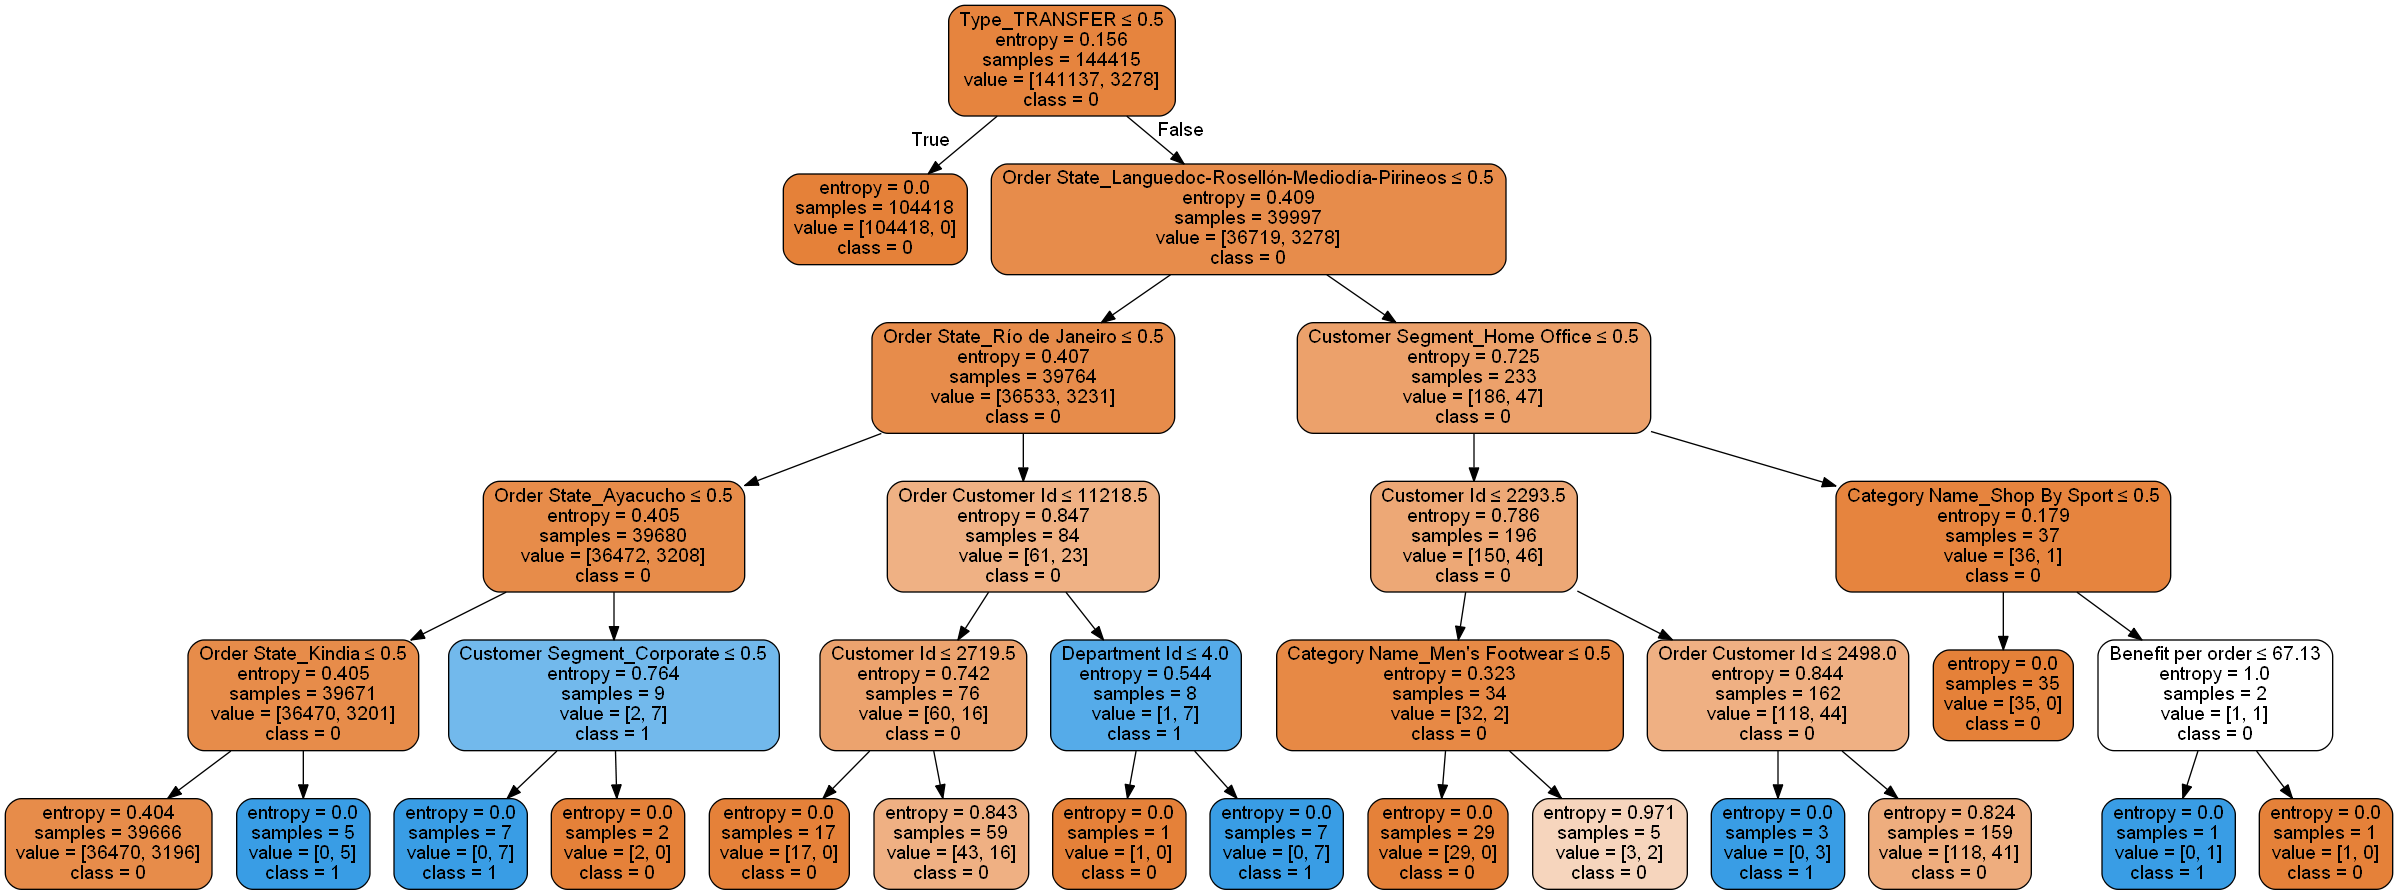

In [20]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features_names,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

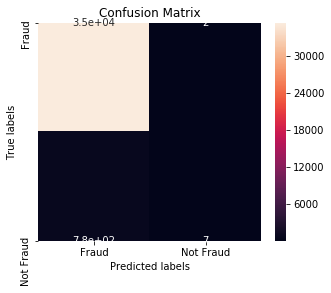

In [21]:
plt.rcParams['figure.figsize']=5,4
ax= plt.subplot()
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
#sns.heatmap(cm,vmin=-1000, vmax=50000, annot=True, ax = ax,annot_kws={"size": 15},fmt='g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Fraud', 'Not Fraud']); ax.yaxis.set_ticklabels(['Fraud', 'Not Fraud']);
#plt.savefig("conf.png")

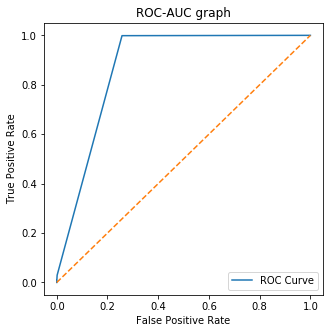

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score
fpr, tpr, thres = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plt.rcParams['figure.figsize']=5,5
plt.plot(fpr, tpr, label = 'ROC Curve' %roc_auc)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC-AUC graph')
plt.show()

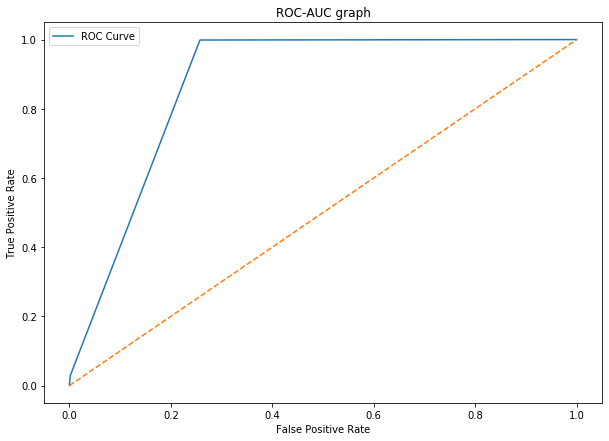

In [23]:
fpr, tpr, thres = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plt.rcParams['figure.figsize']=10,7
plt.plot(fpr, tpr, label = 'ROC Curve' %roc_auc)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC-AUC graph')
plt.show()

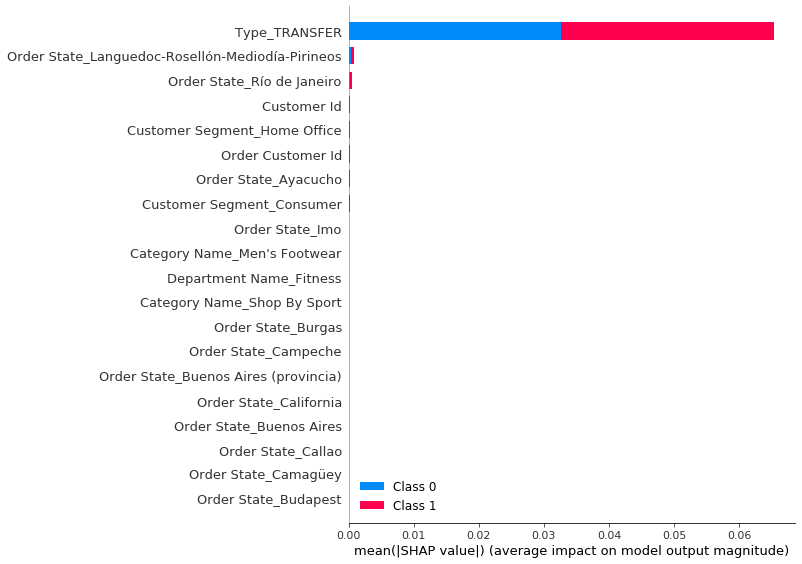

In [24]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

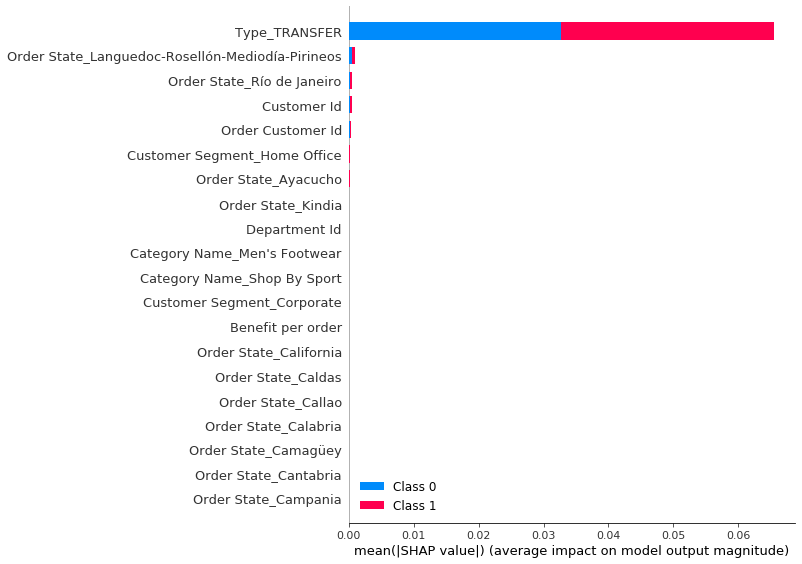

In [26]:
import shap
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")